<a href="https://colab.research.google.com/github/naimudhin/bb_player_price/blob/main/bb_player_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount(mountpoint, force_remount=False, timeout_ms=120000, readonly=False)>

 # Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/datasets/nba2k-full.csv')
df

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Chris Paul,88,#3,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,#3,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,#27,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,#7,Toronto Raptors,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21


In [3]:
df.shape

(464, 15)

In [4]:
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [5]:
df.tail()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
459,Chris Paul,88,#3,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,#3,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21
461,Rudy Gobert,87,#27,Utah Jazz,C,06/26/92,7-1 / 2.16,238 lbs. / 108 kg.,$27525281,France,2013,1,27,NaN,NBA2k21
462,Kyle Lowry,87,#7,Toronto Raptors,G,03/25/86,6-0 / 1.83,205 lbs. / 93 kg.,$30500000,USA,2006,1,24,Villanova,NBA2k21
463,Kristaps Porzingis,87,#6,Dallas Mavericks,F-C,08/02/95,7-3 / 2.21,220 lbs. / 99.8 kg.,$29467800,Latvia,2015,1,4,NaN,NBA2k21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


# Dropping missing rows

In [7]:
df.dropna()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20
5,Stephen Curry,95,#30,Golden State Warriors,G,03/14/88,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009,1,7,Davidson,NBA2k20
6,Anthony Davis,94,#3,Los Angeles Lakers,F-C,03/11/93,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012,1,1,Kentucky,NBA2k20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Pascal Siakam,88,#43,Toronto Raptors,F,04/02/94,6-9 / 2.06,227 lbs. / 103 kg.,$30559200,Cameroon,2016,1,27,New Mexico State,NBA2k21
458,Donovan Mitchell,88,#45,Utah Jazz,G,09/07/96,6-1 / 1.85,211 lbs. / 95.7 kg.,$5195501,USA,2017,1,13,Louisville,NBA2k21
459,Chris Paul,88,#3,Oklahoma City Thunder,G,05/06/85,6-1 / 1.85,175 lbs. / 79.4 kg.,$41358814,USA,2005,1,4,Wake Forest,NBA2k21
460,Bradley Beal,88,#3,Washington Wizards,G,06/28/93,6-3 / 1.91,207 lbs. / 93.9 kg.,$28751774,USA,2012,1,3,Florida,NBA2k21


In [8]:
df.isnull().sum()

,0
full_name,0
rating,0
jersey,0
team,23
position,0
b_day,0
height,0
weight,0
salary,0
country,0


# Dropping unwanted columns

In [9]:
df.drop(['full_name', 'b_day', 'height', 'weight', 'college','version'], axis = 1, inplace=True)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,#23,Los Angeles Lakers,F,$37436858,USA,2003,1,1
1,97,#2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
2,96,#34,Milwaukee Bucks,F-G,$25842697,Greece,2013,1,15
3,96,#7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,#13,Houston Rockets,G,$38199000,USA,2009,1,3


# Removing '#' from jersey number

In [10]:
def remove_hash(value):
    value = value[1:]
    return int(value)

df['jersey'] = df['jersey'].apply(remove_hash)

In [11]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,$37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,$32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,$25842697,Greece,2013,1,15
3,96,7,Brooklyn Nets,F,$37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,$38199000,USA,2009,1,3


# Removing  '$' from salary

In [12]:
df['salary'] = df['salary'].apply(remove_hash)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,25842697,Greece,2013,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3


In [13]:
df['team'].value_counts()

,count
team,
Milwaukee Bucks,19
Brooklyn Nets,19
Los Angeles Lakers,18
Dallas Mavericks,18
Los Angeles Clippers,17
Philadelphia 76ers,16
Phoenix Suns,16
Indiana Pacers,15
New York Knicks,15


In [14]:
df['team'].unique()

array(['Los Angeles Lakers', 'Los Angeles Clippers', 'Milwaukee Bucks',
       'Brooklyn Nets', 'Houston Rockets', 'Golden State Warriors',
       'Portland Trail Blazers', 'Philadelphia 76ers', 'Denver Nuggets',
       'Minnesota Timberwolves', 'Miami Heat', 'Utah Jazz',
       'Detroit Pistons', 'Boston Celtics', 'Dallas Mavericks',
       'San Antonio Spurs', 'Washington Wizards', 'Indiana Pacers',
       'Toronto Raptors', 'Sacramento Kings', 'Phoenix Suns', nan,
       'Cleveland Cavaliers', 'New Orleans Pelicans', 'Orlando Magic',
       'Atlanta Hawks', 'Chicago Bulls', 'Oklahoma City Thunder',
       'New York Knicks', 'Memphis Grizzlies', 'Charlotte Hornets'],
      dtype=object)

# Count plot for various teams

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

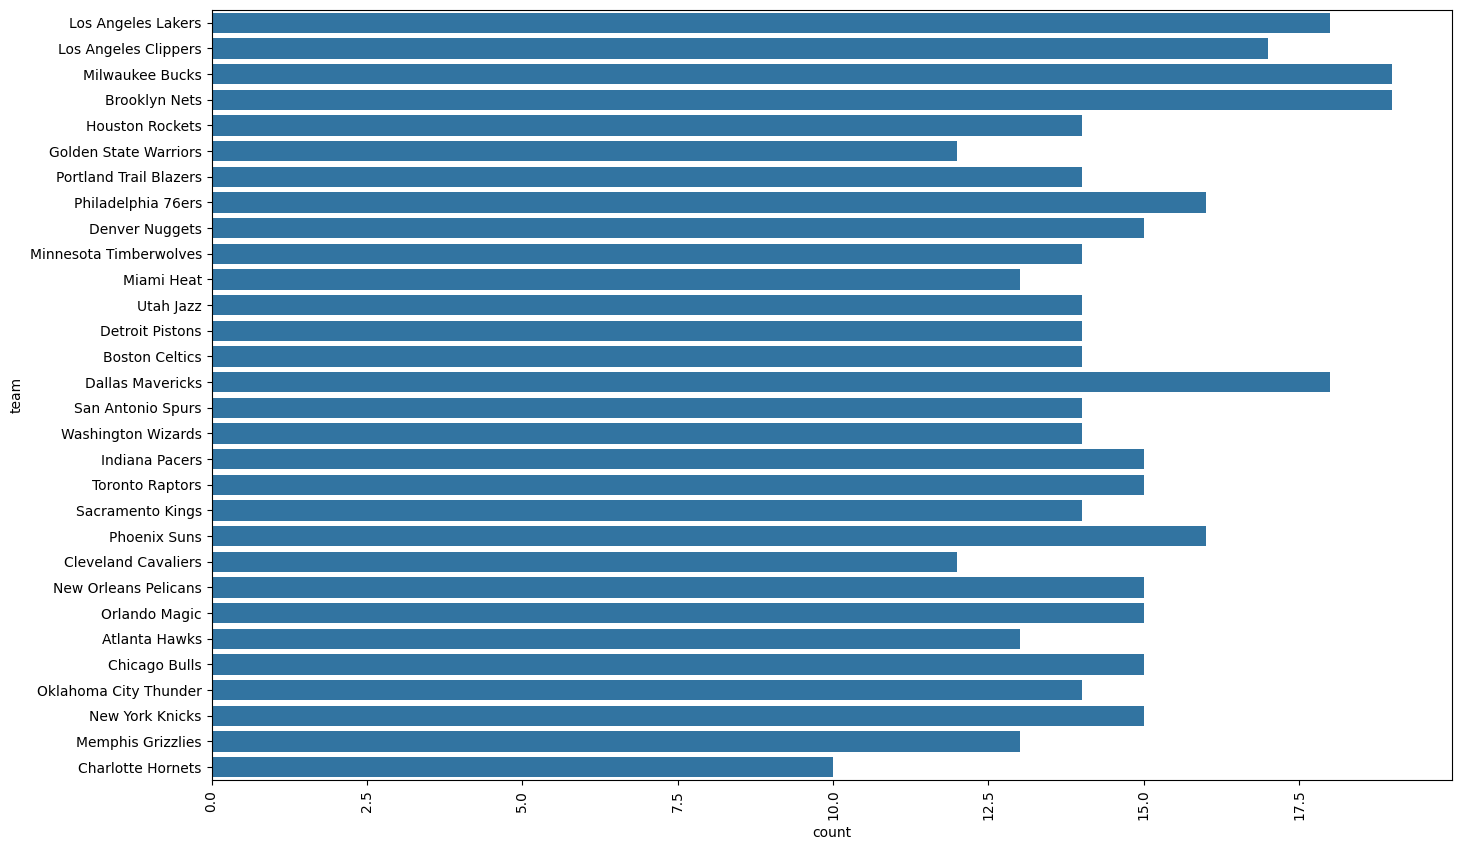

In [15]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df['team'])
plt.xticks(rotation=90)

In [16]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,25842697,Greece,2013,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3


# Removing outliers in country

In [17]:
df['country'].value_counts()

,count
country,
USA,346
Canada,15
Australia,10
France,9
Serbia,7
Germany,6
Croatia,6
Spain,6
Greece,5


In [18]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia','France','Serbia']:
        return 'Others'
    else:
        return value

df['country'] = df['country'].apply(removecountryoutlier)
df['country'].value_counts()

,count
country,
USA,346
Others,77
Canada,15
Australia,10
France,9
Serbia,7


(array([346.,   0.,  77.,   0.,  10.,   0.,   7.,   0.,   9.,  15.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

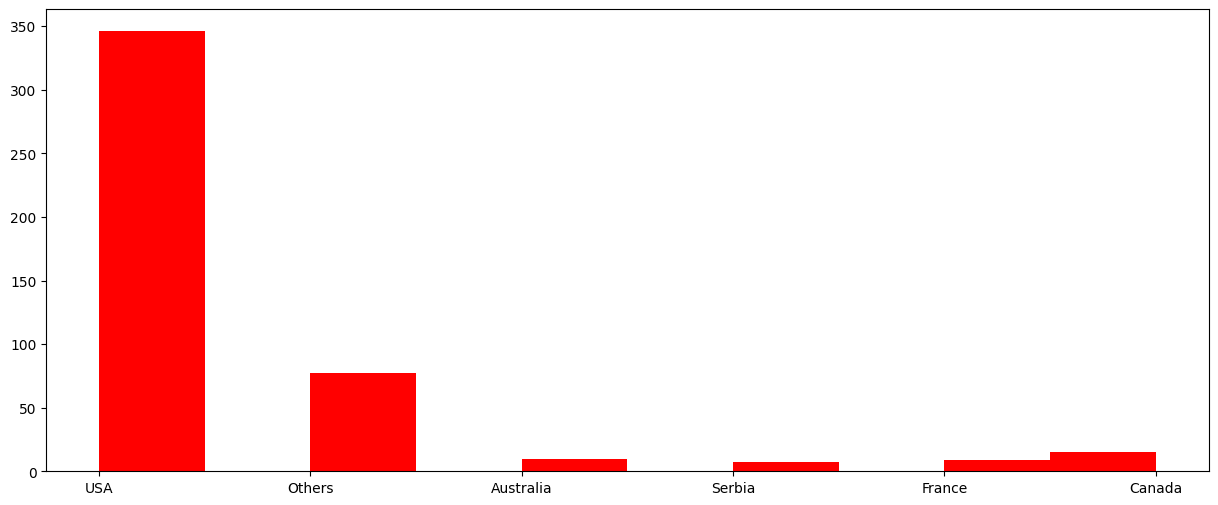

In [19]:
plt.figure(figsize=(15,6))
plt.hist(df['country'],color='r')

In [20]:
df['position'].value_counts()

,count
position,
G,184
F,146
C,53
F-C,39
G-F,21
F-G,15
C-F,6


# Countplot for various positions

<ipython-input-21-1bd555c3fcf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['position'],palette='inferno')


<Axes: xlabel='count', ylabel='position'>

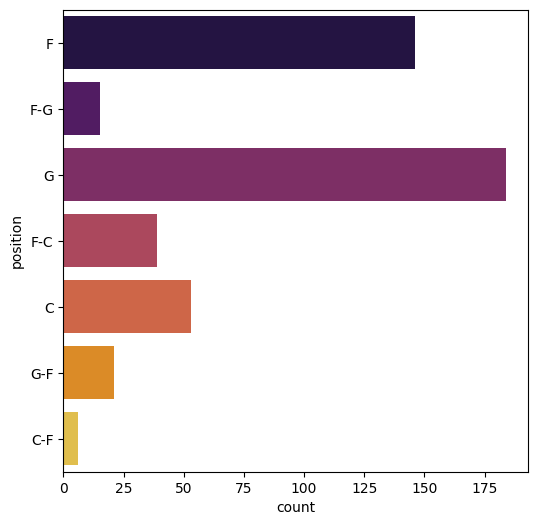

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(df['position'],palette='inferno')

In [22]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak
0,97,23,Los Angeles Lakers,F,37436858,USA,2003,1,1
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15
2,96,34,Milwaukee Bucks,F-G,25842697,Others,2013,1,15
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3


# Identifying odd value and removing

In [23]:
df['draft_round'].unique()

array(['1', '2', 'Undrafted'], dtype=object)

In [24]:
df['draft_peak'].unique()

array(['1', '15', '2', '3', '7', '10', '6', '41', '4', '11', '30', '27',
       '13', '9', '5', '35', '17', '16', '18', '25', '19', '24', '39',
       '45', '31', '36', '32', '48', '12', '38', '47', '8', '33',
       'Undrafted', '40', '14', '22', '42', '46', '20', '29', '26', '51',
       '43', '34', '21', '23', '60', '44', '28', '37', '55', '49', '50',
       '52', '54', '58'], dtype=object)

In [25]:
def remove_undrafted(value):
    if value=='Undrafted':
        return
    else:
        return value

df['draft_round'] = df['draft_round'].apply(remove_undrafted)
df['draft_peak'] = df['draft_peak'].apply(remove_undrafted)

df = df.dropna()

<Axes: xlabel='draft_round', ylabel='rating'>

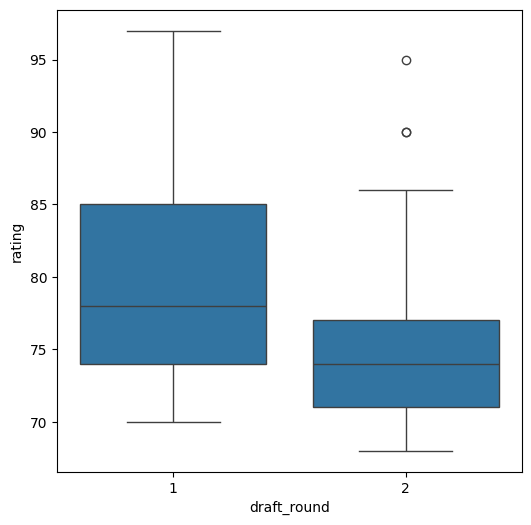

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(x='draft_round',y='rating',data=df)

# Encoding using Label Encoder

In [27]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['position'] = lb.fit_transform(df['position'])
df['country'] = lb.fit_transform(df['country'])
df['team'] = lb.fit_transform(df['team'])




<ipython-input-27-3100e8738f46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = lb.fit_transform(df['position'])
<ipython-input-27-3100e8738f46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = lb.fit_transform(df['country'])
<ipython-input-27-3100e8738f46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

# Train data and Test data splitting

In [28]:
x = df.drop(['salary'], axis = 1)
y = df['salary']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)

# Model creation using Linear regression

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [31]:
diff = y_test - predictions


<ipython-input-32-e02a6c9f3d74>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='salary', ylabel='Density'>

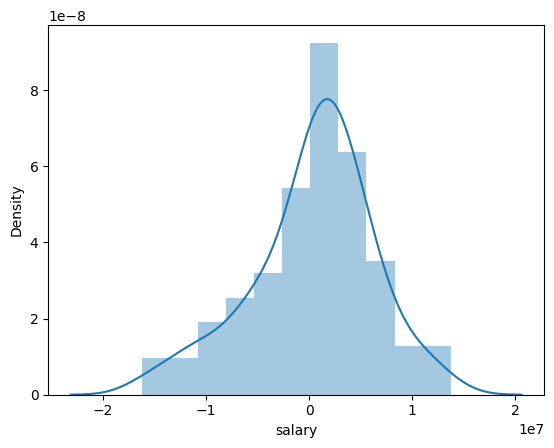

In [32]:
import seaborn as sns
sns.distplot(diff)

# Evaluating R2 score

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7803038434494247

In [34]:
import pickle
pickle.dump(model, open('bb_price_prediction_model.sav', 'wb'))